# Bock vs. 2PL for k>2

This notebook illustrates that the response curve of an option in the Bock model (or equivalently multinomial logistic regression) for k=3 is not in general explainable by an equivalent 2PL model. It can only approximately and if the responses are nicely enough separated.

Version: 12/25/2021

In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve   # solving equations
from scipy.special import logit     # logit function for curve fitting

### Example 1

The first example illustrates that Bock for k=3 (and one correct answer) can also be interpreted under the 2PL model (in certain cases). However, only as approximation! To illustrate we use k=3, and then either just use all 3 parameters, or just the first 2. We compare both the normalization (for 3, 2, or 1 single figure) and the final response curve for the first answer (against 3 or 2). Notice that only the log plot reveals the differences.

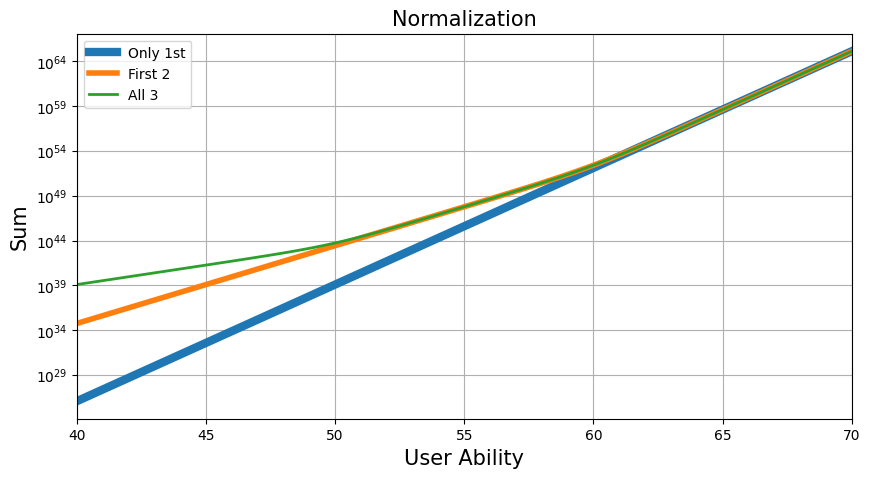

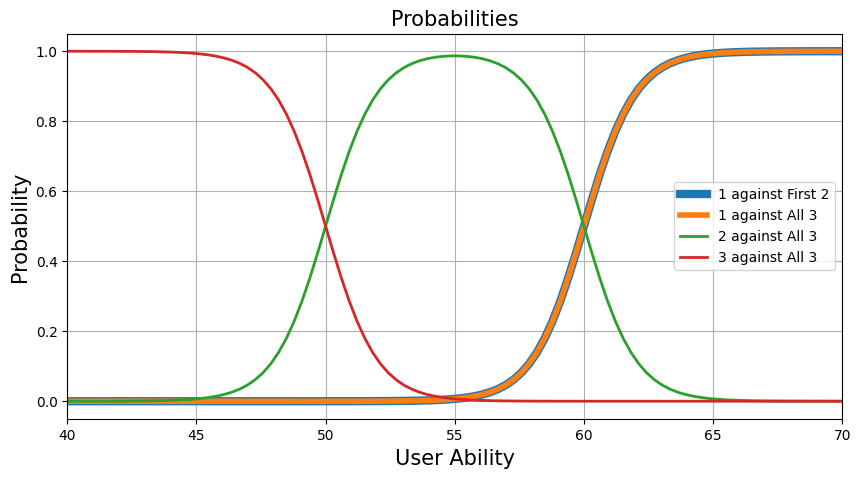

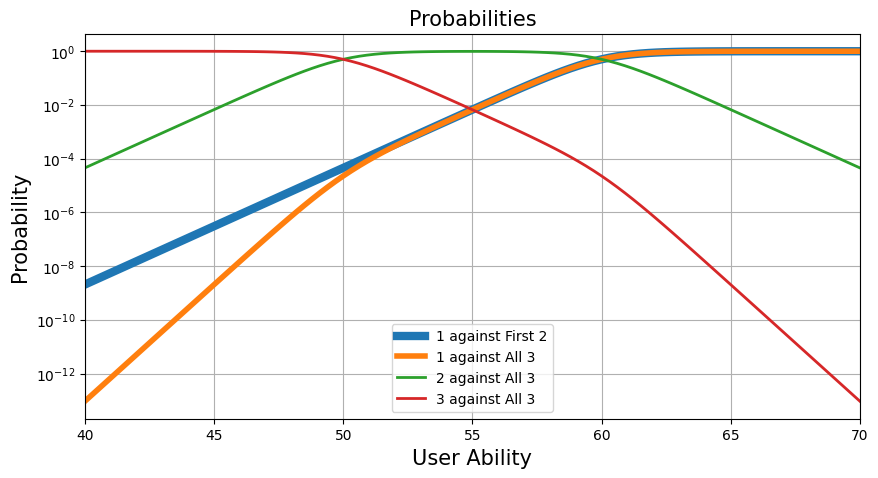

In [2]:
a = np.array([3, 2, 1])
b = np.array([20, 0, -50])
low = 40
high = 70
num = 100
x = np.linspace(low, high, num)

kernel = x[None, :] - b[:, None]
kernel *= a[:, None]
y = np.exp(kernel)
y1 = y[0:3].sum(axis=0) # sum up all 3
y2 = y[0:2].sum(axis=0) # sum up the first 2
y3 = y[0:1].sum(axis=0) # only the first

plt.figure(figsize=(10, 5))
plt.plot(x, y3, label='Only 1st', linewidth=6)
plt.plot(x, y2, label='First 2', linewidth=4)
plt.plot(x, y1, label='All 3', linewidth=2)
plt.yscale("log")
plt.xlim(low, high)
plt.grid(True)
plt.xlabel(r'User Ability', fontsize=15)
plt.ylabel(r'Sum', fontsize=15)
plt.title(r'Normalization', fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x, y[0]/y2, label='1 against First 2', linewidth=6)
plt.plot(x, y[0]/y1, label='1 against All 3', linewidth=4)
plt.plot(x, y[1]/y1, label='2 against All 3', linewidth=2)
plt.plot(x, y[2]/y1, label='3 against All 3', linewidth=2)
plt.xlim(low, high)
plt.grid(True)
plt.xlabel(r'User Ability', fontsize=15)
plt.ylabel(r'Sum', fontsize=15)
plt.ylabel(r'Probability', fontsize=15)
plt.title(r'Probabilities', fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x, y[0]/y2, label='1 against First 2', linewidth=6)
plt.plot(x, y[0]/y1, label='1 against All 3', linewidth=4)
plt.plot(x, y[1]/y1, label='2 against All 3', linewidth=2)
plt.plot(x, y[2]/y1, label='3 against All 3', linewidth=2)
plt.yscale("log")
plt.xlim(low, high)
plt.grid(True, which="both")
plt.xlabel(r'User Ability', fontsize=15)
plt.ylabel(r'Sum', fontsize=15)
plt.ylabel(r'Probability', fontsize=15)
plt.title(r'Probabilities', fontsize=15)
plt.legend()
plt.show()

### Example 2

Example illustrating that Bock for k=3 (and one correct answer) can not be interpreted under the 2PL model in general. Same as before, just now we also fit a 2PL curve to the response curve of the top one (from 10% and 90% invervals). Notice that the 50% point (the "difficulty") is not aligned.

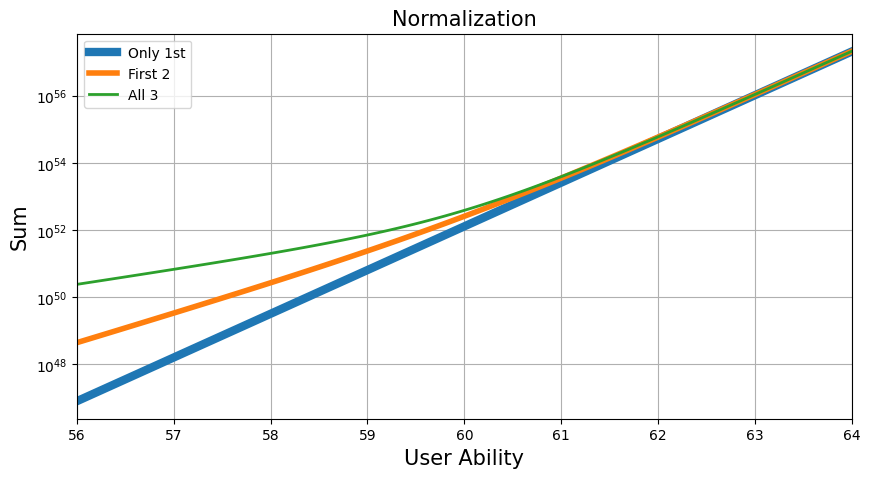

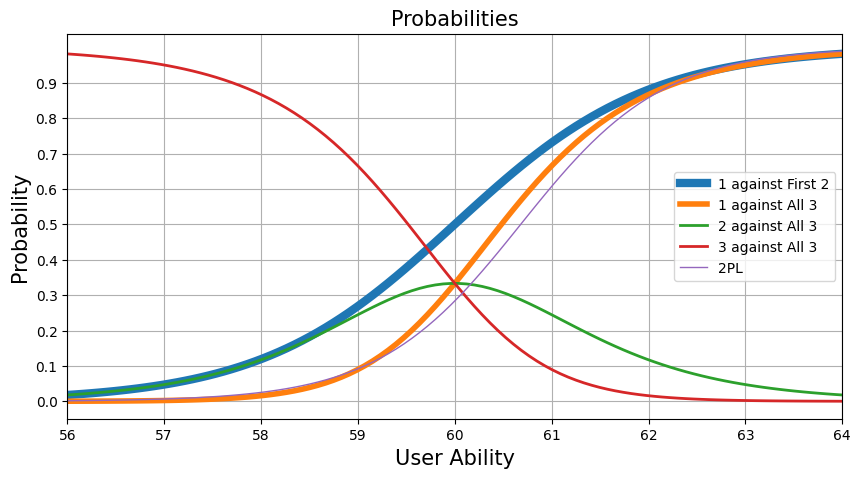

(x1, x2) = (59.06729226160119, 62.29337550595522)
(a0, b0) = (1.3621623565861691, 60.680333883778204)


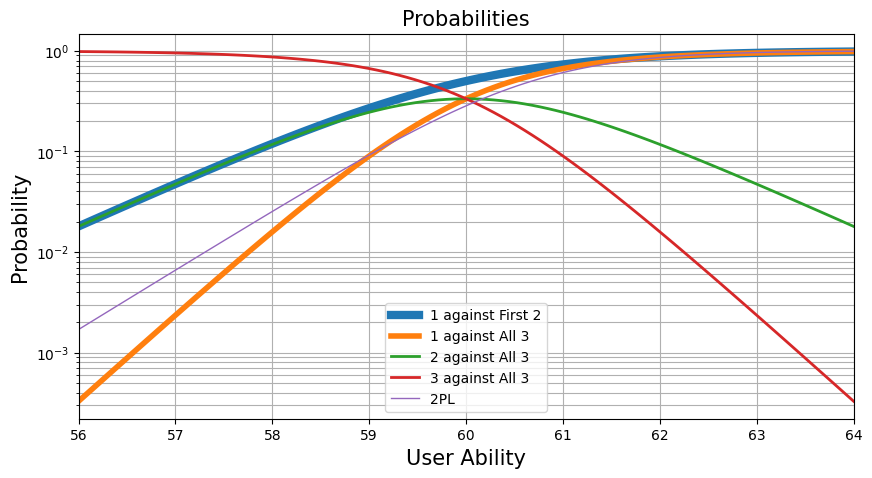

In [3]:
a = np.array([3, 2, 1])
b = np.array([20, 0, -60])
low = 56
high = 64
num = 100
x = np.linspace(low, high, num)

kernel = x[None, :] - b[:, None]
kernel *= a[:, None]
y = np.exp(kernel)
y1 = y[0:3].sum(axis=0) # sum up all 3
y2 = y[0:2].sum(axis=0) # sum up the first 2
y3 = y[0:1].sum(axis=0) # only the first

plt.figure(figsize=(10, 5))
plt.plot(x, y3, label='Only 1st', linewidth=6)
plt.plot(x, y2, label='First 2', linewidth=4)
plt.plot(x, y1, label='All 3', linewidth=2)
plt.yscale("log")
plt.xlim(low, high)
plt.grid(True)
plt.xlabel(r'User Ability', fontsize=15)
plt.ylabel(r'Sum', fontsize=15)
plt.title(r'Normalization', fontsize=15)
plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
plt.plot(x, y[0]/y2, label='1 against First 2', linewidth=6)
plt.plot(x, y[0]/y1, label='1 against All 3', linewidth=4)
plt.plot(x, y[1]/y1, label='2 against All 3', linewidth=2)
plt.plot(x, y[2]/y1, label='3 against All 3', linewidth=2)
plt.xlim(low, high)
plt.grid(True)
ax.set_yticks(np.arange(0, 1., 0.1))
plt.xlabel(r'User Ability', fontsize=15)
plt.ylabel(r'Sum', fontsize=15)
plt.ylabel(r'Probability', fontsize=15)
plt.title(r'Probabilities', fontsize=15)
plt.legend()

# fitting a 2PL model to the response curve of the top question for Bock with K=3
func = lambda tau : (np.exp(a[0] * (tau - b[0]))) / np.exp(a * (tau - b)).sum()    # 1 against All 3
# func = lambda tau : model_figure.Bock_IRT_response(a, b, tau)    # 1 against All 3
func1 = lambda tau : func(tau) - 0.1                                # defines two functions at 0.1 and 0.9
func2 = lambda tau : func(tau) - 0.9
x_initial_guess = 60
[x_sol1] = fsolve(func1, x_initial_guess)
[x_sol2] = fsolve(func2, x_initial_guess)
b0 = np.average([x_sol1, x_sol2])                                   # b0 is the average of those points
a0 = 2 * logit(0.9) / (x_sol2 - x_sol1)  # a0 can be then fit from 0.1 and 0.9 points
y2PL = 1 / (1 + np.exp(-a0*(x-b0)))
plt.plot(x, y2PL, label='2PL', linewidth=1)
plt.legend()
plt.show()
print("(x1, x2) = ({}, {})".format(x_sol1, x_sol2))
print("(a0, b0) = ({}, {})".format(a0, b0))

plt.figure(figsize=(10, 5))
plt.plot(x, y[0]/y2, label='1 against First 2', linewidth=6)
plt.plot(x, y[0]/y1, label='1 against All 3', linewidth=4)
plt.plot(x, y[1]/y1, label='2 against All 3', linewidth=2)
plt.plot(x, y[2]/y1, label='3 against All 3', linewidth=2)
plt.plot(x, y2PL, label='2PL', linewidth=1)
plt.yscale("log")
plt.xlim(low, high)
plt.grid(True, which="both")
plt.xlabel(r'User Ability', fontsize=15)
plt.ylabel(r'Sum', fontsize=15)
plt.ylabel(r'Probability', fontsize=15)
plt.title(r'Probabilities', fontsize=15)
plt.legend()
plt.show()